In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas
import pandas as pd


import tensorflow as tf
import tf_data

In [4]:
import tensorflow as tf
import json, os
import numpy as np

# Tested with TensorFlow 2.1.0
print('version={}, CUDA={}, GPU={}'.format(
    tf.__version__, tf.test.is_built_with_cuda(),
    len(tf.config.list_physical_devices('GPU')) > 0))
      
if len(tf.config.list_physical_devices('GPU')) > 0:
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
    strategy = tf.distribute.OneDeviceStrategy("gpu:0")
else:
    strategy = tf.distribute.OneDeviceStrategy("cpu:0")

version=2.3.0, CUDA=False, GPU=False


In [16]:
!nvidia-smi

/usr/bin/sh: nvidia-smi: command not found


# Complete model

In [80]:
from model import *
from plotting import * 

In [81]:
# output_dim_nodes == latent spoace dimension for the clusters
dcgn = DeepClusterGN(nconv=3, output_dim_nodes=32, layers_input=[64,64,64], layers_coord=[64,64,64,64])

In [27]:
a = model(X)

In [58]:
X, y = tf_data.get(ds_train)

In [109]:
X,y = tf_data.get(ds_test)

In [40]:
X,y = tf_data.get(special_ds)

In [110]:
(dense_clclass, windclass, enregr), mask_cls, \
    (cl_X, coord, adj, coord_att_ws, output_rechits, out_gcn, out_SAcl ,out_SAw, att_weights_clcall, att_w_windclass,att_weights_en) = model(X)

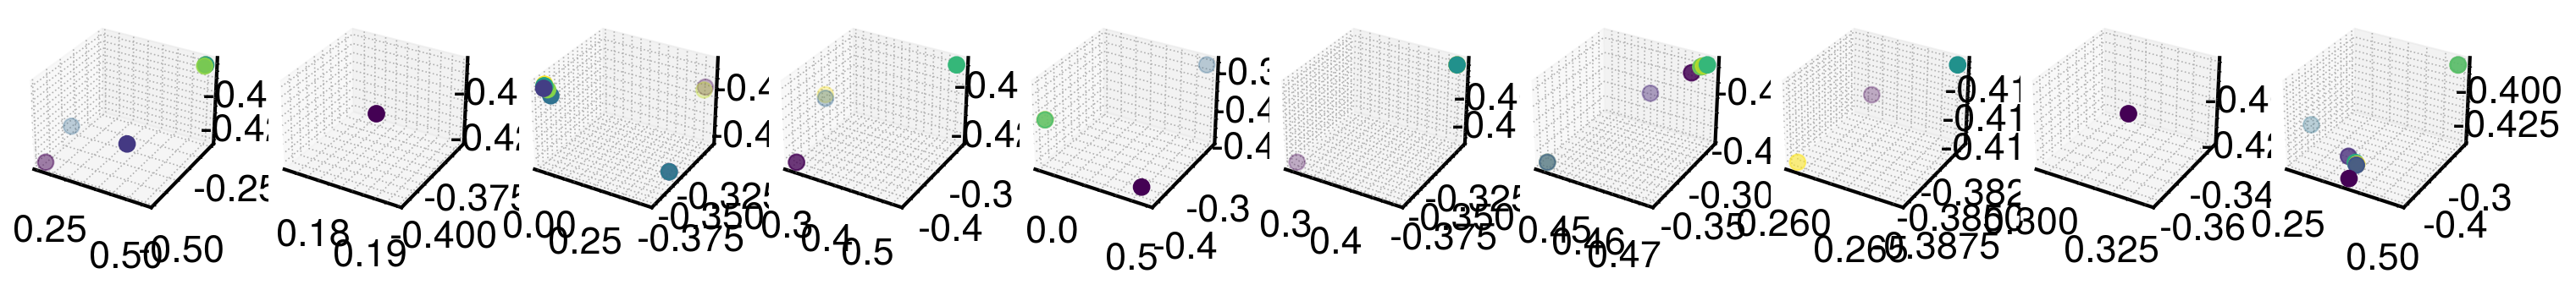

In [111]:
plot3D(coord[0:10], mask_cls)

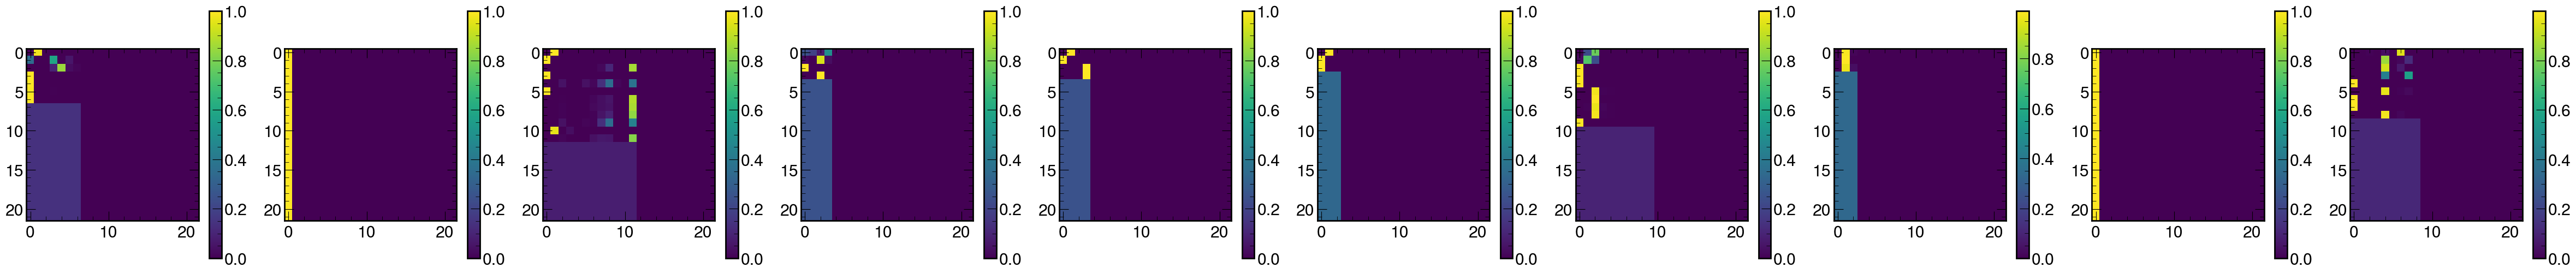

In [112]:
plotM(*coord_att_ws[0:10], t=False)

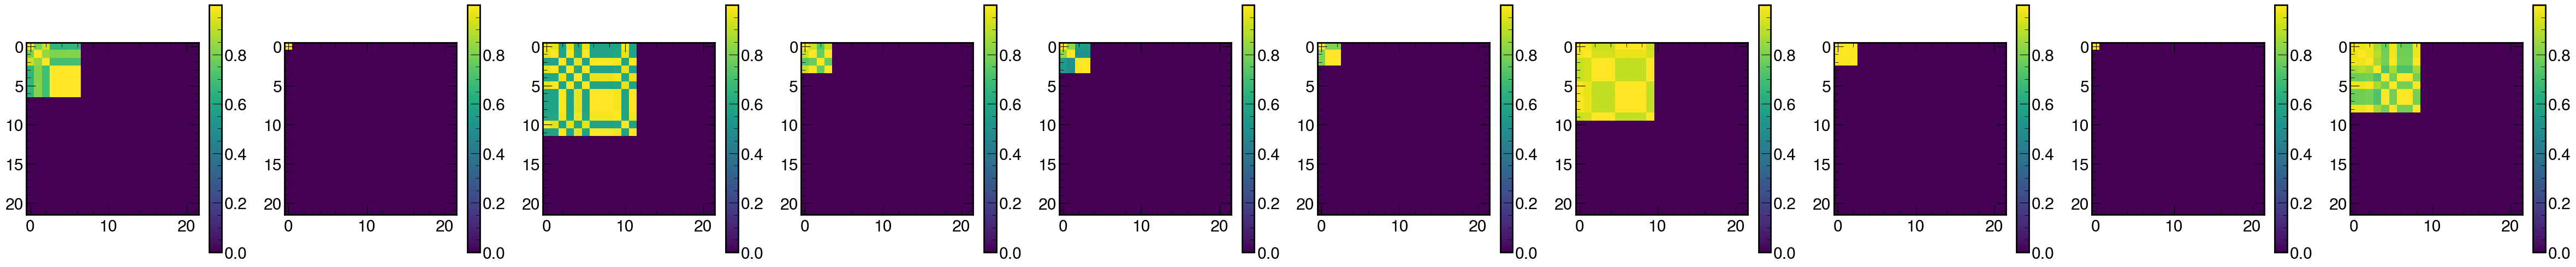

In [113]:
plotM(*adj[0:10])

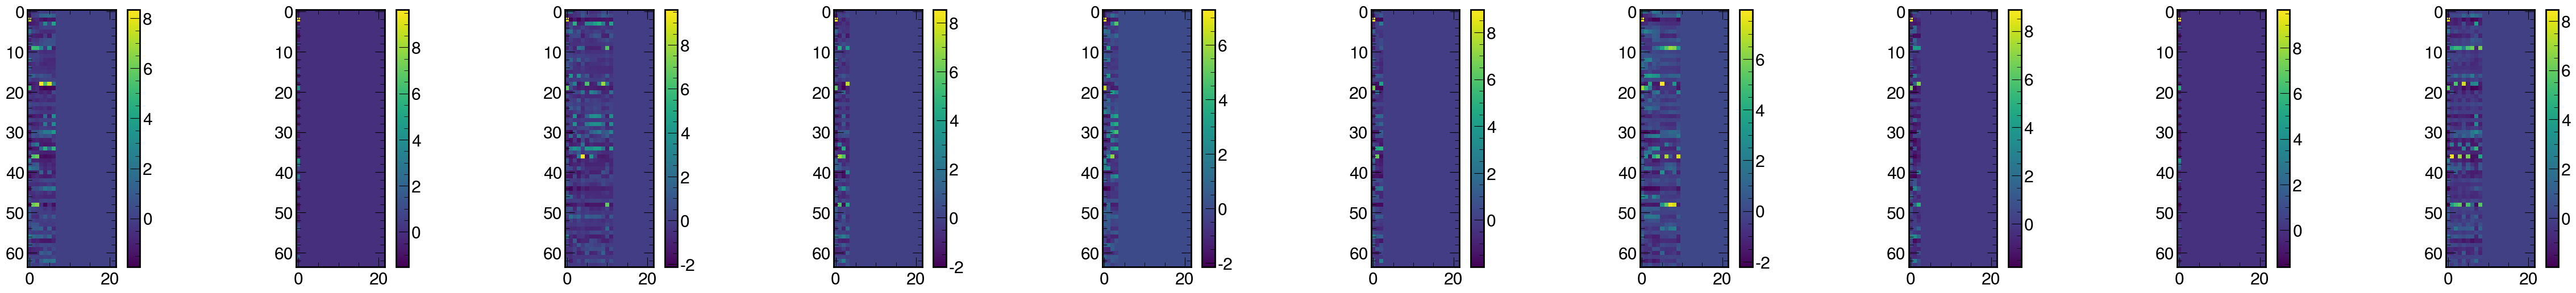

In [114]:
plotM(*cl_X[0:10])

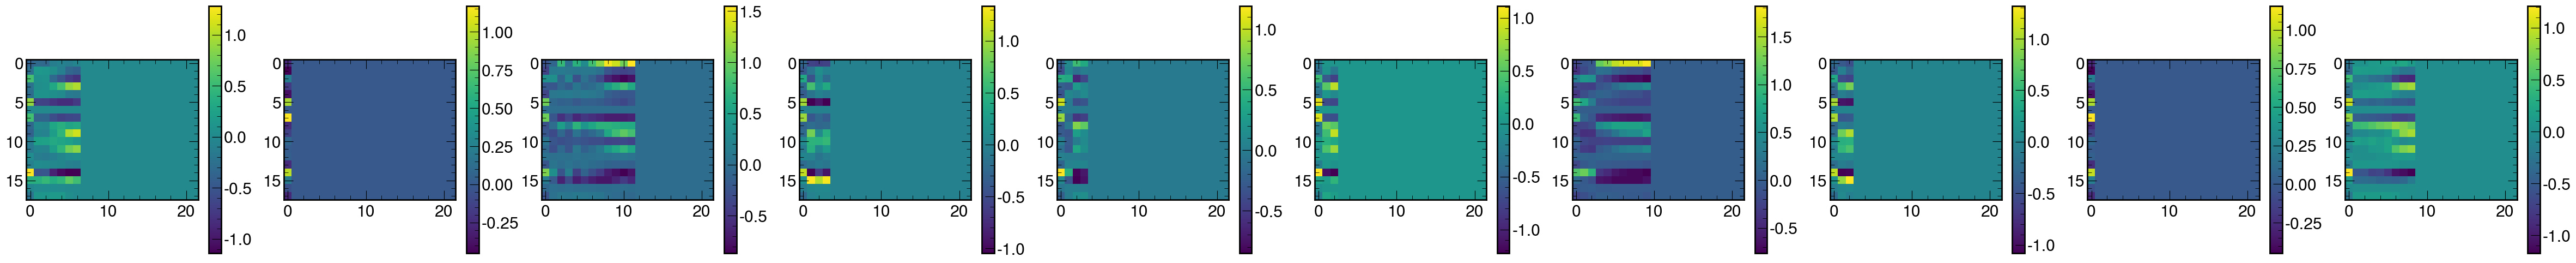

In [115]:
plotM(*output_rechits[0:10])

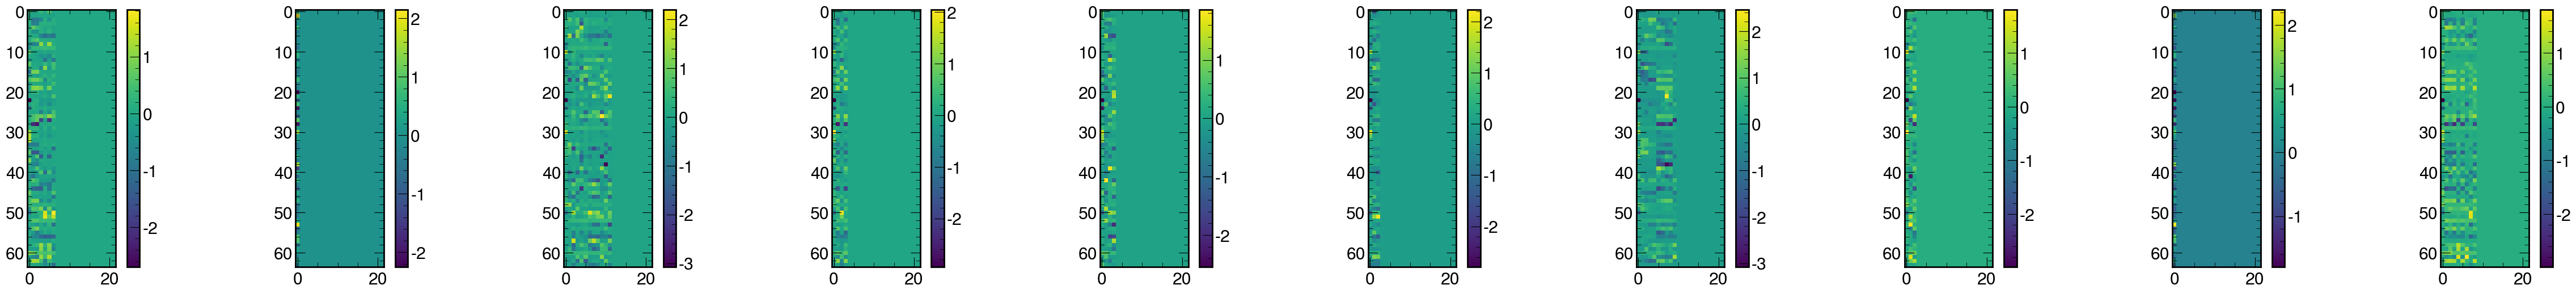

In [116]:
plotM(*out_gcn[0:10])

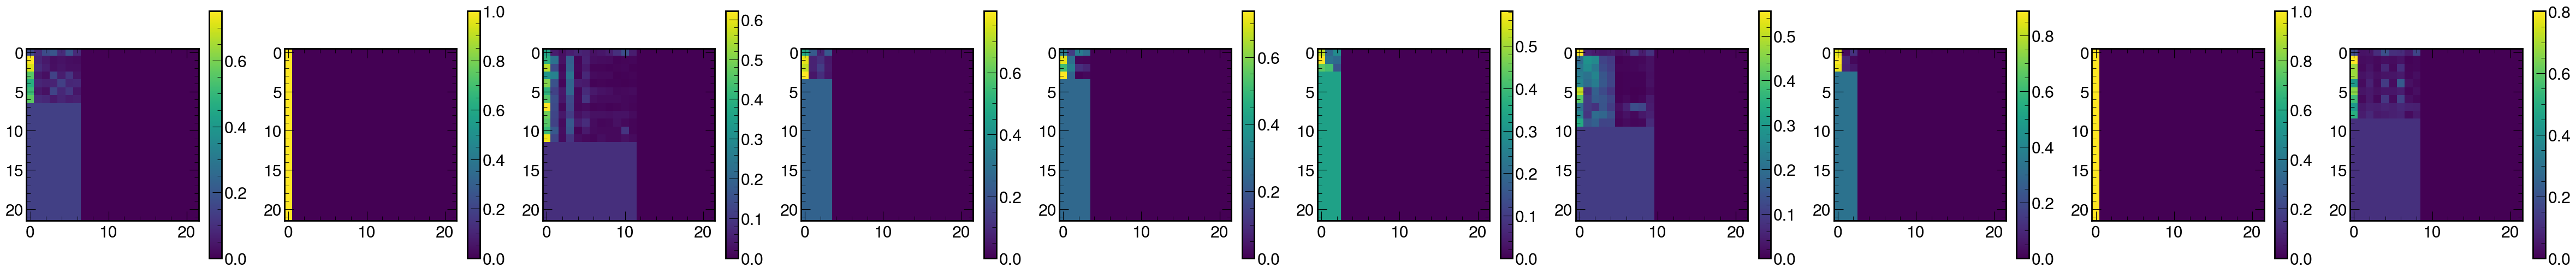

In [117]:
plotM(*att_weights_clcall[0:10], t=False)

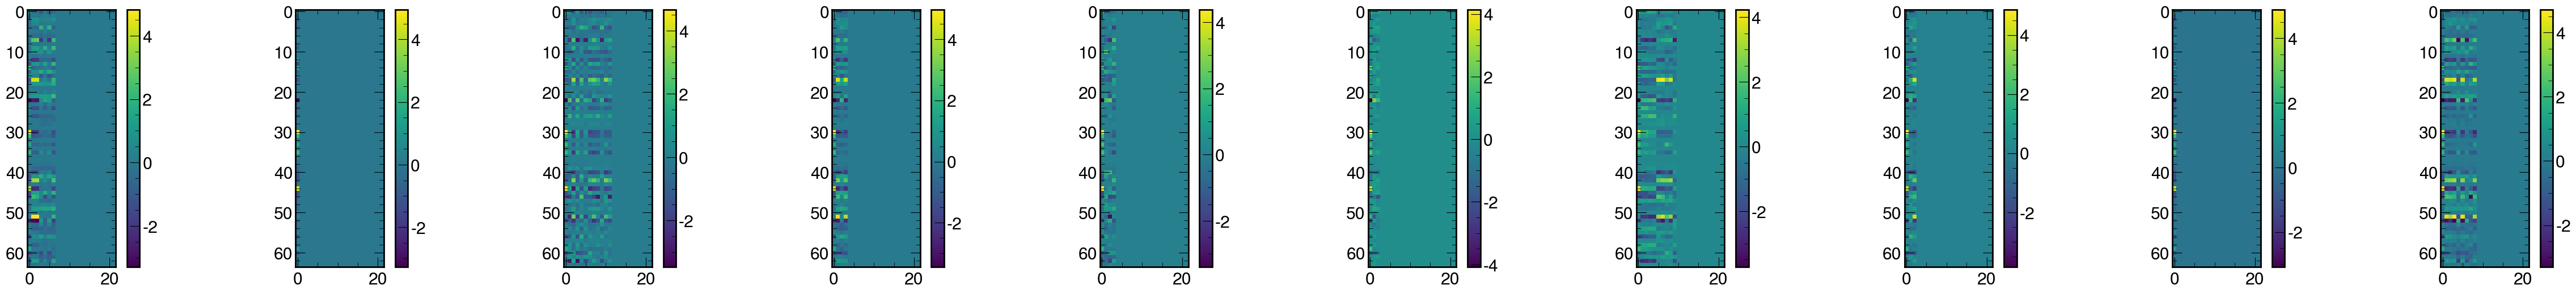

In [118]:
plotM(*out_SAcl[0:10])

In [124]:
tf.nn.sigmoid(dense_clclass)[2]

<tf.Tensor: shape=(22, 1), dtype=float32, numpy=
array([[1.0000000e+00],
       [9.9843687e-01],
       [8.7308799e-05],
       [9.9215174e-01],
       [1.2332309e-03],
       [4.3400535e-01],
       [8.5553457e-04],
       [2.2969213e-04],
       [8.5048331e-04],
       [2.0641573e-02],
       [1.2527198e-03],
       [6.4052234e-04],
       [5.0000000e-01],
       [5.0000000e-01],
       [5.0000000e-01],
       [5.0000000e-01],
       [5.0000000e-01],
       [5.0000000e-01],
       [5.0000000e-01],
       [5.0000000e-01],
       [5.0000000e-01],
       [5.0000000e-01]], dtype=float32)>

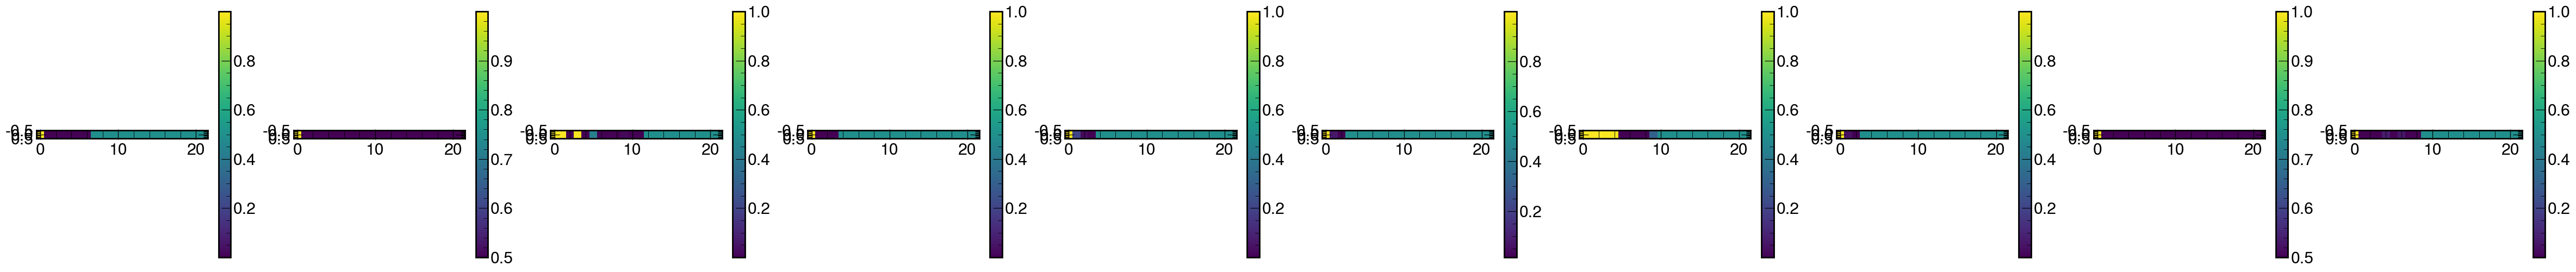

In [119]:
plotM(*tf.nn.sigmoid(dense_clclass)[0:10])

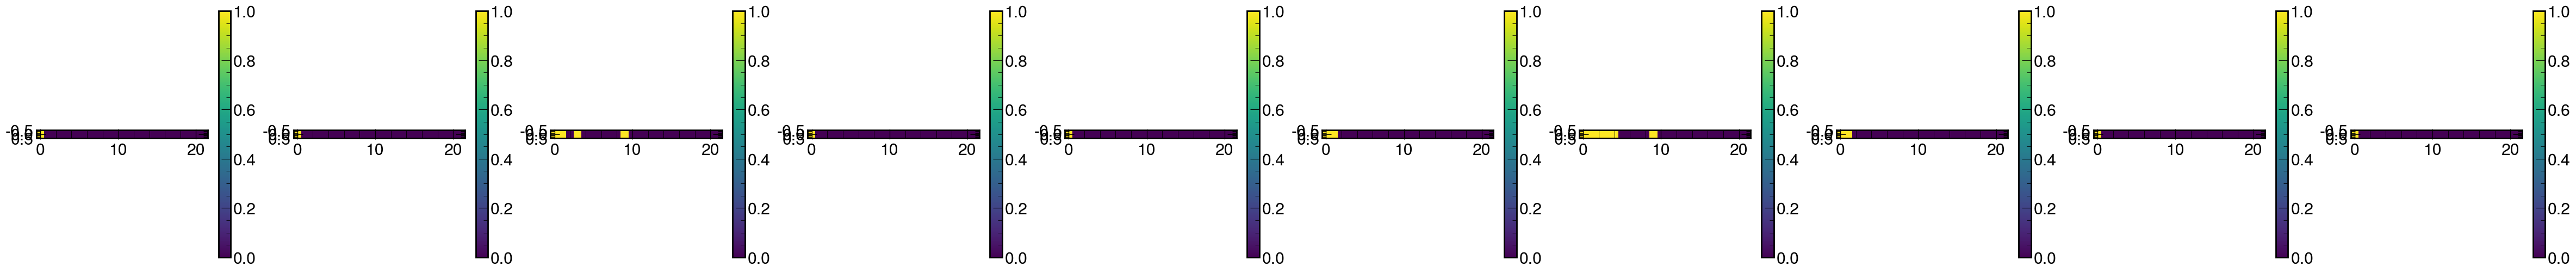

In [120]:
plotM(*y[0][0:10])

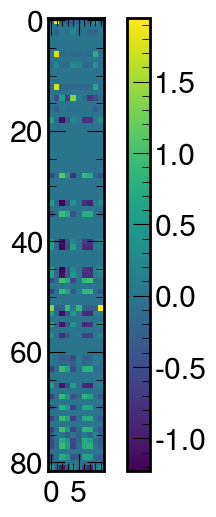

In [121]:
plotM(out_SAw[0:10])

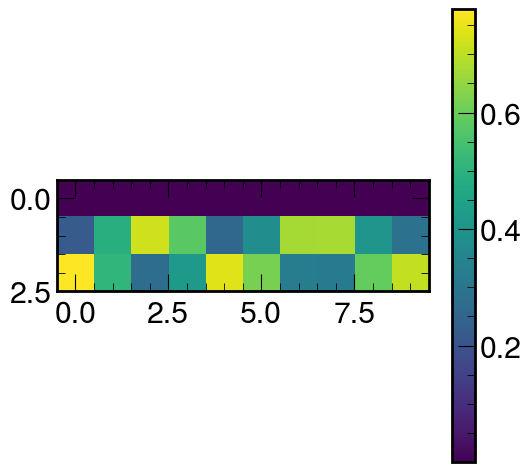

In [122]:
plotM(tf.nn.softmax(windclass[0:10]))

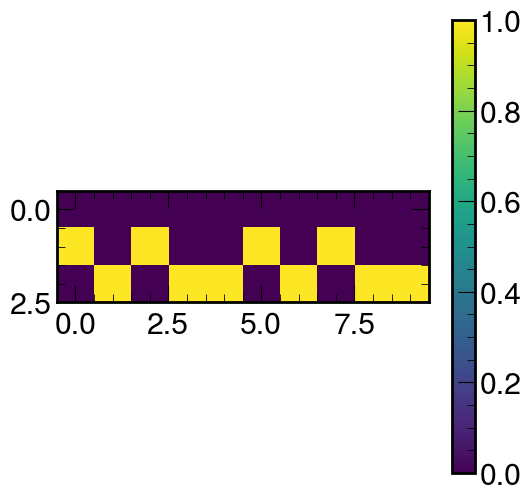

In [123]:
plotM(y[1][0:10])

# Test training

In [5]:
import tf_data
from model import *
from plotting import * 

- Ele training:  199254
- Gamma training:  299529
- Ele test:  38275
- Gamma test:  26130
- unmatched training:  758757
- unmatched testing:  84404

In [6]:
models_path = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v17/"

#rain_steps_per_epoch = 
#eval_steps_per_epoch = 3e5 // batch_size
from collections import namedtuple
# Args = namedtuple('args', [ 'models_path', 'load','nepochs','ntrain','nval','nfeatures',
#                             'n_seed_features','batch_size','lr_decay','lr',
#                             'hidden_dim_input','hidden_dim_coord', 'hidden_dim_id',
#                             'n_layers_input', 'n_layers_id', 'n_layers_coord',
#                            'distance_dim','num_conv','dropout','convlayer',
#                            'nclass_labels', 'opt'])
Args = namedtuple('args', [ 'models_path', 'load','initial_epoch','nepochs','ntrain','nval',
                           'lr_decay','lr', 'batch_size','opt', 'activation', 
                           'output_dim_rechits', 'output_dim_nodes', 'output_dim_gconv', 'output_dim_sa_clclass',
                           'output_dim_sa_windclass','output_dim_sa_enregr','coord_dim','coord_dim_sa','nconv_rechits','nconv', 
                           'layers_input','layers_clclass','layers_windclass','layers_enregr', 'n_windclasses',
                          'dropout','l2_reg','loss_clusters','loss_window','loss_softF1','loss_en_resol','loss_en_softF1','loss_en_regr'])


args = Args( 
models_path = models_path,
load = False,
initial_epoch = 0,
nepochs = 200,
ntrain = 1300000,
nval = 400000,
lr_decay = 0.,
lr = 5e-4,
batch_size = 512,
opt='adam',
    
activation = tf.keras.activations.elu,
output_dim_rechits = 18,
output_dim_nodes = 64,
output_dim_gconv = 64,
output_dim_sa_clclass = 64,
output_dim_sa_windclass = 64,
output_dim_sa_enregr = 64,
coord_dim = 3,
coord_dim_sa = 15,
nconv_rechits = 4,
nconv = 3,
layers_input = [256,128,128,64],
layers_clclass = [256,128,128,64],
layers_windclass = [128,64,64],
layers_enregr = [256,128,128,64],
n_windclasses = 3, 
dropout = 0.1,
l2_reg = True, 
    
loss_clusters= 100,
loss_window=  1., 
loss_softF1=  1.,
loss_en_resol =  0., 
loss_en_softF1 = 100,
loss_en_regr = 0.01
)

### Dataset loading

In [7]:
outdir = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v17/run_01"

In [8]:
data_path_train = {"ele_match": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/recordio_allinfo_v10/training/calo_matched/*.proto",
                   "gamma_match": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/recordio_allinfo_v10/training/calo_matched/*.proto",
                 # "nomatch": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/recordio_allinfo_v10/training/no_calo_matched/*.proto",
                  #"gamma_nomatch": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/recordio_allinfo_v2/training/no_calo_matched/*.proto"
                  }
data_path_test = {"ele_match": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/recordio_allinfo_v10/testing/calo_matched/*.proto",
                   "gamma_match": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/recordio_allinfo_v10/testing/calo_matched/*.proto",
#                   "nomatch": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/recordio_allinfo_v10/testing/no_calo_matched/*.proto",
                  #"gamma_nomatch": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/recordio_allinfo_v2/testing/no_calo_matched/*.proto"
                  }

In [9]:
features_dict = {

"cl_features" : [ "en_cluster","et_cluster",
            "cluster_eta", "cluster_phi", 
            "cluster_ieta","cluster_iphi","cluster_iz",
            "cluster_deta", "cluster_dphi",
            "cluster_den_seed","cluster_det_seed",
            
            "cl_r9", "cl_sigmaIetaIeta", "cl_sigmaIetaIphi",
            "cl_sigmaIphiIphi","cl_swissCross",
            "cl_nxtals", "cl_etaWidth","cl_phiWidth"],
    

 "window_features" : [ "max_en_cluster","max_et_cluster","max_deta_cluster","max_dphi_cluster","max_den_cluster","max_det_cluster",
                    "min_en_cluster","min_et_cluster","min_deta_cluster","min_dphi_cluster","min_den_cluster","min_det_cluster",
                    "mean_en_cluster","mean_et_cluster","mean_deta_cluster","mean_dphi_cluster","mean_den_cluster","mean_det_cluster" ],

# Metadata about the window like true energy, true calo position, useful info
 "window_metadata" :  ["en_true_sim","et_true_sim", "en_true_gen", "et_true_gen",
                    "en_true_sim_good", "et_true_sim_good",
                    "nclusters_insc",
                    "nVtx", "rho", "obsPU", "truePU",
                    "sim_true_eta", "sim_true_phi",  
                    "en_mustache_raw", "et_mustache_raw","en_mustache_calib", "et_mustache_calib",
                    "event_tot_simen_PU","wtot_simen_PU", "wtot_simen_sig" ]    
}
    
    

In [10]:
# Load a balanced dataset from the list of paths given to the function. Selected only the requestes features from clusters and prepare batches
train_ds = tf_data.load_balanced_dataset_batch(data_path_train, features_dict, args.batch_size,weights={"ele_match":0.5,"gamma_match":0.5} )#weights={"ele_match":0.4,"gamma_match":0.4}
# the indexes for energy and et are from the features list we requestes
# train_ds = tf_data.delta_energy_seed(train_ds, en_index=0, et_index=1)
train_ds = tf_data.normalize_features(train_ds, "normalization_v10.npz", "normalization_wind_features_v10.npz")
train_ds = tf_data.training_format(train_ds)


test_ds = tf_data.load_balanced_dataset_batch(data_path_test,features_dict, args.batch_size,weights={"ele_match":0.5,"gamma_match":0.5})
# the indexes for energy and et are from the features list we requestes
# test_ds = tf_data.delta_energy_seed(test_ds, en_index=0, et_index=1)
test_ds = tf_data.normalize_features(test_ds, "normalization_v10.npz", "normalization_wind_features_v10.npz")
test_ds = tf_data.training_format(test_ds)

# Create training and validation
ds_train = train_ds.prefetch(300).take(args.ntrain // args.batch_size).repeat(args.nepochs)
ds_test  = test_ds.prefetch(300).take(args.nval // args.batch_size).repeat(args.nepochs)

In [11]:
if args.lr_decay > 0:
        #lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        #    args.lr,
        #    decay_steps=int(args.ntrain//args.batch_size),
        #    decay_rate=args.lr_decay
        #)
        lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
            args.lr,
            decay_steps=int(args.ntrain//args.batch_size),
            decay_rate=args.lr_decay,
            staircase=True
        )
else:
    lr_schedule = args.lr


In [12]:
def get_model(args, weights=None):

    loss_weights = {"clusters":args.loss_clusters, "window":args.loss_window, 
                    "softF1":args.loss_softF1, "en_resol":args.loss_en_resol, "en_softF1":args.loss_en_softF1,"en_regr": args.loss_en_regr}
    tf.keras.backend.clear_session()

    
    with strategy.scope():
        opt = tf.keras.optimizers.Adam(learning_rate=args.lr)
        # Construction of the model
        model = DeepClusterGN(
                    activation = args.activation,
                    output_dim_rechits = args.output_dim_rechits,
                    output_dim_nodes =args.output_dim_nodes,
                    output_dim_gconv = args.output_dim_gconv,
                    output_dim_sa_clclass = args.output_dim_sa_clclass,
                    output_dim_sa_windclass = args.output_dim_sa_windclass,
                    output_dim_sa_enregr = args.output_dim_sa_enregr,
                    coord_dim = args.coord_dim,
                    coord_dim_sa = args.coord_dim_sa,
                    nconv_rechits = args.nconv_rechits,
                    nconv = args.nconv,
                    layers_input = args.layers_input,
                    layers_clclass = args.layers_clclass,
                    layers_windclass = args.layers_windclass,
                    layers_enregr = args.layers_enregr,
                    n_windclasses = args.n_windclasses,
                    dropout = args.dropout,
                    l2_reg = args.l2_reg,
                    loss_weights= loss_weights
                    )


        model.compile(optimizer=args.opt)
    #         metrics=[Precision(),Recall(), energy_resolution|_insc,energy_resolution_outsc,
    #                      energy_resolution_insc_log,energy_resolution_outsc_log,])
        model.set_metrics()

        for X, y in ds_train:
            ypred = model(X)
            #l = custom_loss(y, ypred)
            break
        
        if weights:
            model.load_weights(weights)
        
        return model

In [13]:
model = get_model(args)

In [14]:
model.summary()

Model: "deep_cluster_gn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
graph_builder (GraphBuilding multiple                  75889     
_________________________________________________________________
GHN_global (GHConvI)         multiple                  8256      
_________________________________________________________________
SA_clclass (SelfAttentionBlo multiple                  24960     
_________________________________________________________________
dense_clclass (Sequential)   (512, 17, 1)              90753     
_________________________________________________________________
SA_windclass (SelfAttentionB multiple                  41344     
_________________________________________________________________
dense_windclass (Sequential) (512, 3)                  23235     
_________________________________________________________________
SA_enregr (SelfAttentionBloc multiple              

In [15]:
model.load_weights(outdir+"/weights.best.hdf5")

### Test loss

In [16]:
X,y_true= tf_data.get(ds_test)

In [17]:
y_out = model(X, training=False)
    
cl_X_initial, wind_X_norm , cl_hits, is_seed,n_cl = X
(dense_clclass,dense_windclass, en_regr_factor),  mask_cls, _  = y_out
y_clclass, y_windclass, cl_X, wind_X, y_metadata, cl_labels = y_true
y_target = tf.cast(y_clclass, tf.float32)

pred_prob = tf.nn.sigmoid(dense_clclass) * mask_cls[:,:,tf.newaxis]
pred_prob_window = tf.nn.softmax(dense_windclass)
y_pred = tf.cast(pred_prob >= 0.5, tf.float32)
y_mustache = tf.cast(cl_labels[:,:,-2] == 1 , tf.float32)

En = cl_X[:,:,0:1]    
Et = cl_X[:,:,1:2]    
Et_tot_window = tf.squeeze(tf.reduce_sum(Et, axis=1))
En_tot_window = tf.squeeze(tf.reduce_sum(En, axis=1))
Et_true = tf.reduce_sum( tf.squeeze(Et * y_target),axis=1)

Et_sel =  tf.reduce_sum( tf.squeeze(Et * y_pred),axis=1)
Et_sel_true = tf.reduce_sum( tf.squeeze(Et * y_pred * y_target ),axis=1)
Et_sel_mustache = tf.reduce_sum( tf.squeeze(Et) * y_mustache, axis=1)  
Et_sel_mustache_true = tf.reduce_sum( tf.squeeze(Et * y_target) * y_mustache, axis=1)

En_true_sim = y_metadata[:,0]  
En_true_sim_good = y_metadata[:,4]
En_mustache_calib = y_metadata[:,15]

En_true = tf.reduce_sum( tf.squeeze(En * y_target),axis=1)
En_true_gen =  y_metadata[:,2]
En_sel = tf.reduce_sum( tf.squeeze(En * y_pred),axis=1) 
En_sel_true = tf.reduce_sum( tf.squeeze(En * y_pred * y_target),axis=1)  
En_sel_corr = En_sel * tf.squeeze(en_regr_factor)  
En_sel_mustache = tf.reduce_sum( tf.squeeze(En) * y_mustache, axis=1)
En_sel_mustache_true = tf.reduce_sum( tf.squeeze(En * y_target) * y_mustache, axis=1)

In [24]:
fn_sum = tf.math.cumsum(y_target*(1 -  y_pred), axis=-2)
fp_sum = tf.math.cumsum(y_pred*(1-y_target), axis=-2)
true_sum = tf.math.cumsum(y_target, axis=-2)
mask_first_false_negative =  (fn_sum == 1) & (y_target == 1)
mask_first_false_positive =   (fp_sum ==1) & (y_target == 0)
mask_second_false_negative =   (fn_sum==2) & (y_target == 1)
mask_second_false_positive =  (fp_sum ==2) & (y_target == 0)
mask_second = (true_sum == 2) & (y_target ==1)
mask_thirs = (true_sum == 3) & (y_target ==1)
En_zero = tf.zeros(En.shape)
En_first_false_negative = tf.squeeze(tf.reduce_sum(tf.where(mask_first_false_negative, En, En_zero), axis=-2))
En_first_false_positive  = tf.squeeze(tf.reduce_sum(tf.where(mask_first_false_positive, En, En_zero), axis=-2))
En_second_false_negative = tf.squeeze(tf.reduce_sum(tf.where(mask_second_false_negative, En, En_zero), axis=-2))
En_second_false_positive  = tf.squeeze(tf.reduce_sum(tf.where(mask_second_false_positive, En, En_zero), axis=-2))

In [33]:
mask_second[0]

<tf.Tensor: shape=(18, 1), dtype=bool, numpy=
array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])>

In [22]:
true_sum[0]

<tf.Tensor: shape=(18, 1), dtype=float32, numpy=
array([[1.],
       [2.],
       [3.],
       [4.],
       [4.],
       [4.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.]], dtype=float32)>